In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
heart_disease = pd.read_csv('/content/drive/MyDrive/code/heart_disease_cleveland_con.csv')

In [7]:
heart_disease.shape

(303, 6)

In [8]:
heart_disease.head()

,age,trestbps,chol,thalach,oldpeak,label
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [9]:
heart_disease.iloc[:,0:5] = normalize(heart_disease.iloc[:,0:5])

In [10]:
heart_disease.head()

,age,trestbps,chol,thalach,oldpeak,label
0,0.197466,0.454485,0.730310,0.470156,0.007209,0
1,0.190612,0.455194,0.813659,0.307256,0.004267,1
2,0.225885,0.404571,0.772056,0.434914,0.008766,1
3,0.108753,0.382105,0.734817,0.549643,0.010287,0
4,0.136832,0.433857,0.680821,0.574026,0.004672,0


In [11]:
X = heart_disease.drop(['label'],axis = 1)
Y = heart_disease['label']

In [13]:
k_range = range(1,11)

In [15]:
k_means_models = [KMeans(n_clusters = k, random_state= 1).fit(X) for k in k_range ]

In [16]:
k_means_models

[KMeans(n_clusters=1, random_state=1),
 KMeans(n_clusters=2, random_state=1),
 KMeans(n_clusters=3, random_state=1),
 KMeans(n_clusters=4, random_state=1),
 KMeans(n_clusters=5, random_state=1),
 KMeans(n_clusters=6, random_state=1),
 KMeans(n_clusters=7, random_state=1),
 KMeans(random_state=1),
 KMeans(n_clusters=9, random_state=1),
 KMeans(n_clusters=10, random_state=1)]

In [18]:
centroids = [one_model.cluster_centers_ for one_model in k_means_models]

In [20]:
k_euclid = [cdist(X,cent, 'euclidean') for cent in centroids]

In [ ]:
k_euclid[1]

In [22]:
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [23]:
wcss = [sum(d**2) for d in dist ]

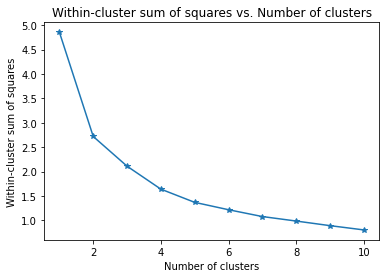

In [27]:
plt.plot([i+1 for i in range(0, len(wcss))], wcss, marker = '*')
plt.title('Within-cluster sum of squares vs. Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [28]:
k_means_2 = KMeans(n_clusters = 2, random_state = 1).fit(X)
k_means_3 = KMeans(n_clusters = 3, random_state = 1).fit(X)
k_means_4 = KMeans(n_clusters = 4, random_state = 1).fit(X)

In [29]:
k_means_2.labels_

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [31]:
h_clustering = AgglomerativeClustering(affinity='euclidean',linkage = 'complete').fit(X)

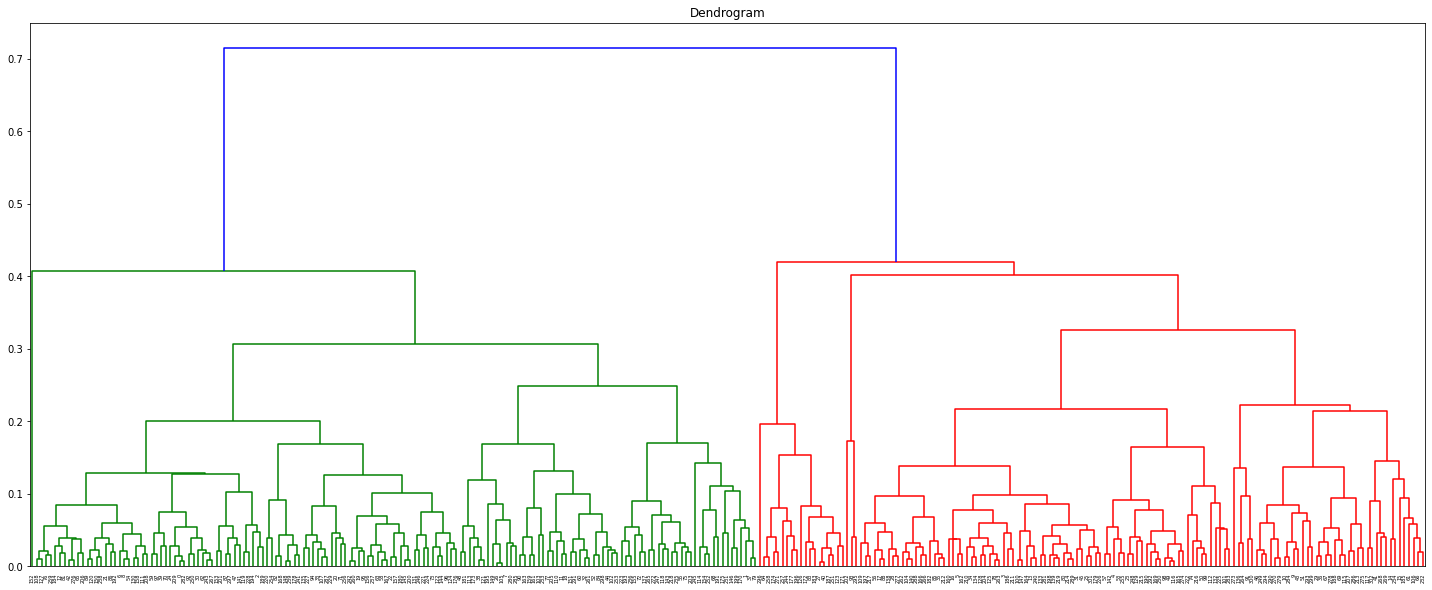

In [33]:
plt.figure(figsize = (25,10))
plt.title('Dendrogram')
dendrogram(linkage(X,'complete'))
plt.show()

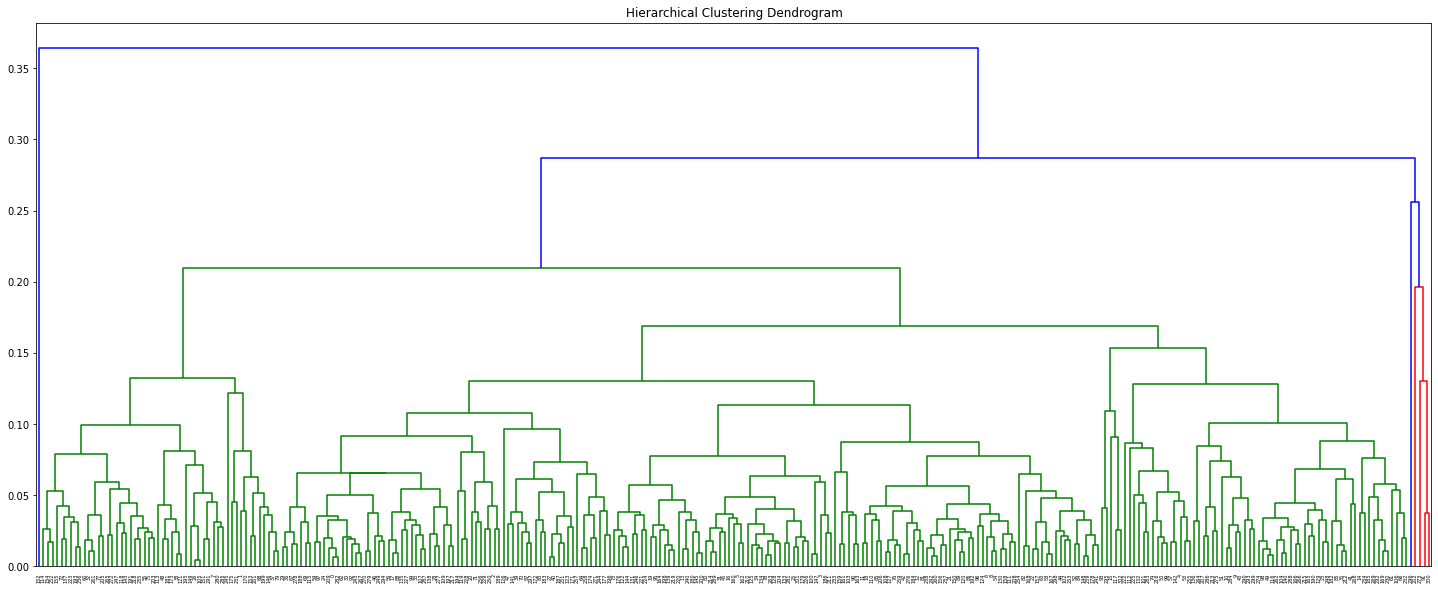

In [34]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'average'))
plt.show()

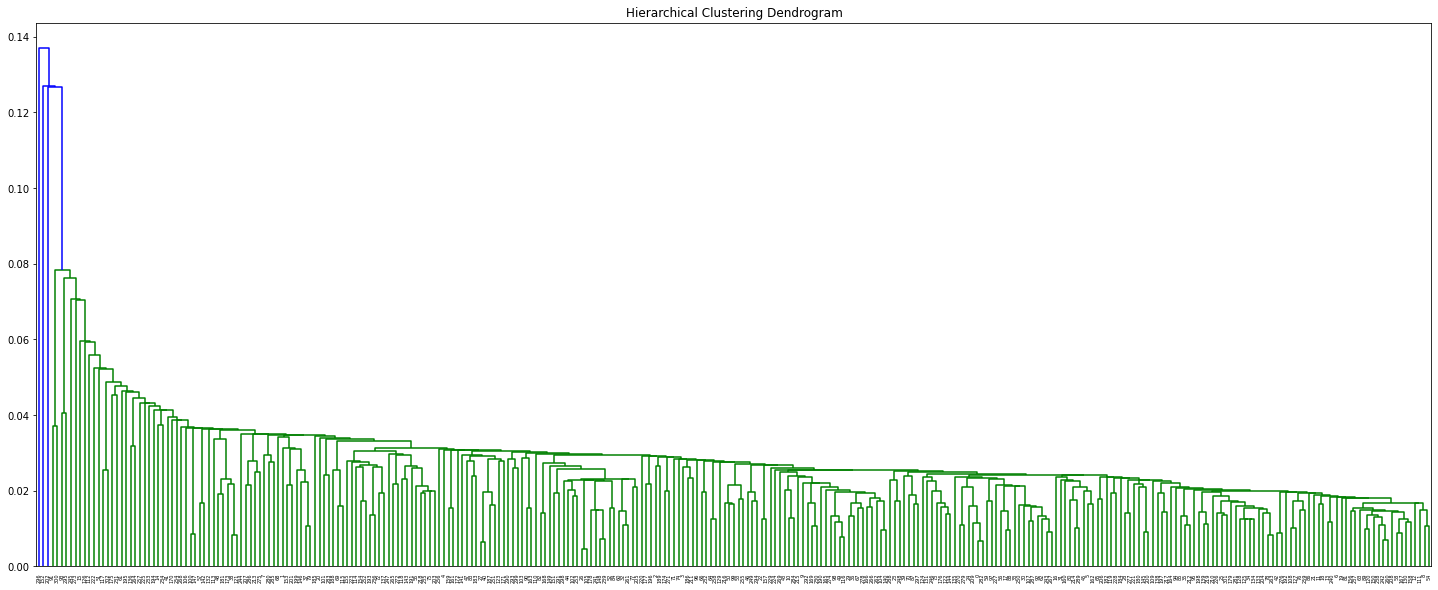

In [35]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'single'))
plt.show()

In [36]:
#K-Means 를 이용한 붓꽃 데이터셋 클러스터링
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [38]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [39]:
kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [40]:
irisDF['cluster'] = kmeans.labels_

In [41]:
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


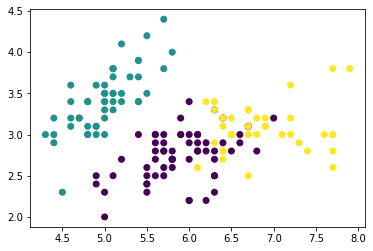

In [45]:
plt.scatter(x=irisDF.loc[:, 'sepal_length'], y=irisDF.loc[:, 'sepal_width'], c=irisDF['cluster']) 

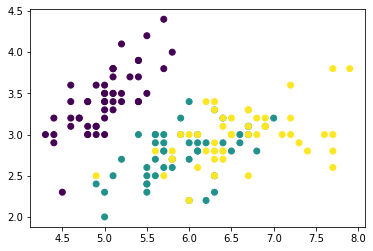

In [48]:
plt.scatter(x=irisDF.loc[:, 'sepal_length'], y=irisDF.loc[:, 'sepal_width'], c=irisDF['target']) 

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


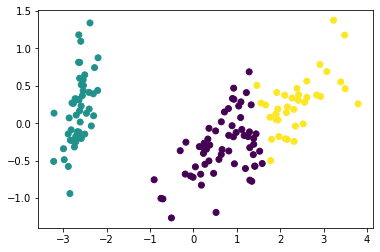

In [47]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

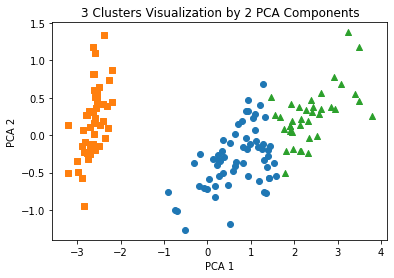

In [49]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


In [ ]:
샘프수 100개 
n_features = 2
센터ㅡ 4개 
0.8

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(100, 2) (100,)
[0 1 2 3] [25 25 25 25]


In [51]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,0.567626,3.359282,0
1,-2.282541,8.049101,3
2,1.585100,4.401127,0


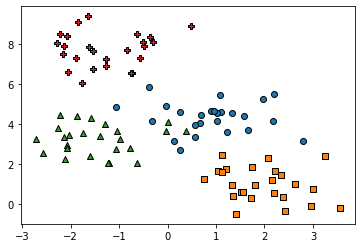

In [52]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

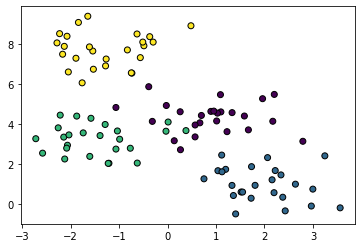

In [56]:
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )


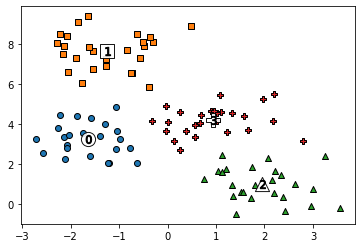

In [55]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [58]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data = iris.data, columns = feature_names )
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
from sklearn.cluster import DBSCAN

dbscan  = DBSCAN(eps = 0.6,min_samples = 8,metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)


In [60]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [63]:
irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [64]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

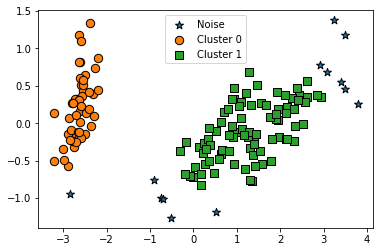

In [65]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

# eps, minsamples 0.6/ 8
- eps 커지면 노이즈는? 적어진다
- eps 작아지면 노이즈는? 많아진다. 
- min samples 작아지면 노이즈는? 적어진다
- min samples 커지먼 노이즈는? 많아진다


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
         2                 4
2        1                46
        -1                 4
Name: dbscan_cluster, dtype: int64


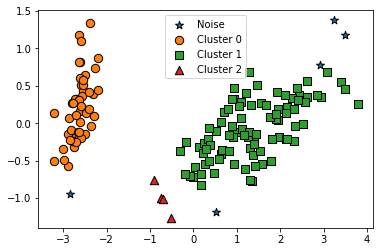

In [69]:
dbscan = DBSCAN(eps=0.6, min_samples=4, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

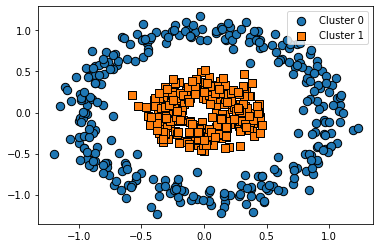

In [77]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=600, shuffle=True, noise=0.1, random_state=0, factor=0.3)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


IndexError: ignored

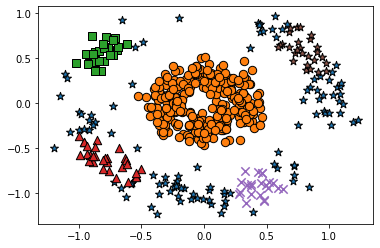

In [81]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.18, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
